In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 4\07.2023.Instacart Basket Analysis\Data'

In [3]:
# Loading high customers flags dataframe
high_act_cust = pd.read_pickle (os.path.join (path, 'Prepared data', 'high_act_cust_flags.pkl'))

In [4]:
high_act_cust.shape

(28668554, 32)

In [5]:
#Allowing pandas to show all the columns

pd.options.display.max_columns=None

In [6]:
high_act_cust.head()

,user_id,State,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,prices_mean_user,price_flag,user_median_days_since_order,mediandays_flag,Region,level_of_activity,age_flag,income_flag,parent_flag,Age & Children,Age & Family status
0,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,2543867,5,1,9,30.0,Mid range product,Busiest days,Average orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married
1,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,1285508,7,5,15,11.0,Mid range product,Regularly busy,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married
2,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,2578584,8,1,15,10.0,Mid range product,Busiest days,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married
3,26711,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,4,4.3,2524893,3,3,11,30.0,Low range product,Slowest days,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married
4,26711,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,4,4.3,2984525,4,1,17,19.0,Low range product,Busiest days,Average orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married


# 1.Creating visualization for the profile customer columns (income, age, age&children, age&family status)

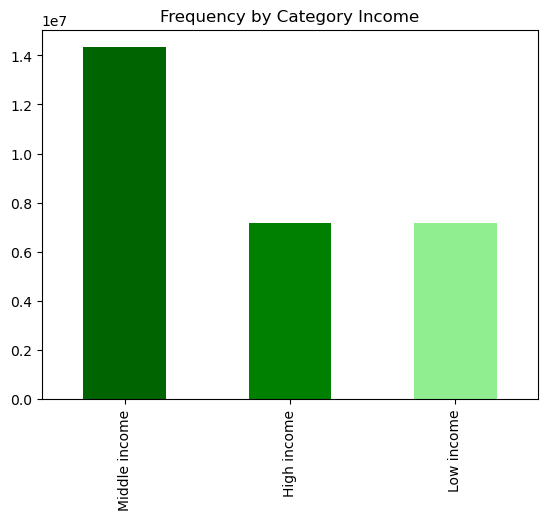

In [13]:
# Customers income distribution
income_bar = high_act_cust['income_flag'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'], title = 'Frequency by Category Income')

In [19]:
income_bar.figure.savefig(os.path.join(path, 'income_bar.png'))

Output: The Barchart shows that most part of the clients are from middle income.

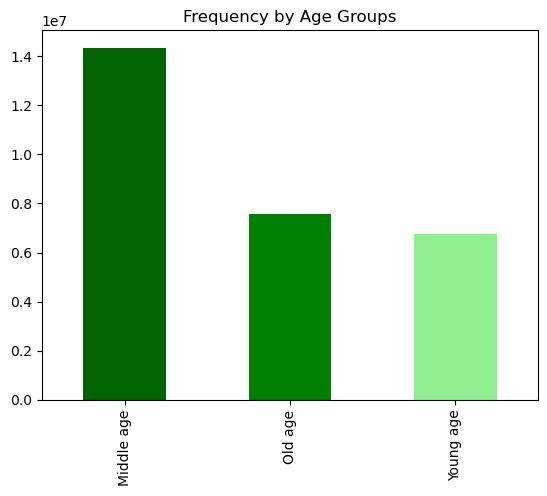

In [14]:
# Customers age distribution
age_bar = high_act_cust['age_flag'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'], title = 'Frequency by Age Groups')

In [20]:
age_bar.figure.savefig(os.path.join(path, 'age_bar.png'))

Output: The barchart shows that the most part of the clients are form middle age

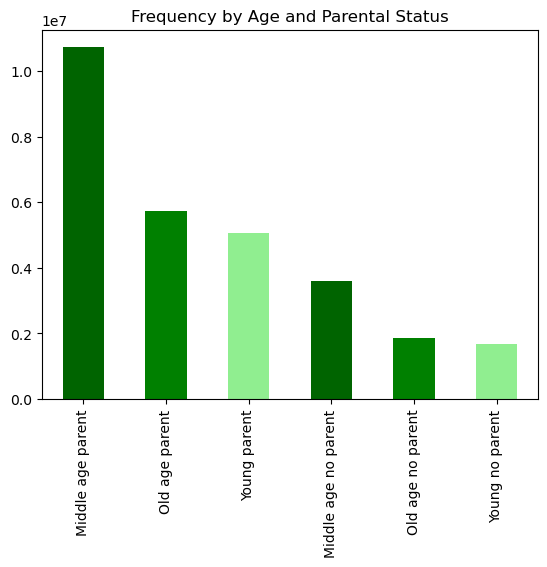

In [15]:
# Customers Age & Children distribution
age_children_bar = high_act_cust['Age & Children'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'], title = 'Frequency by Age and Parental Status')

In [21]:
age_children_bar.figure.savefig(os.path.join(path, 'age_children_bar.png'))

Output: The Barchart shows that the most frequent client profile is Middle age parent followed by Old age parent.

In [ ]:
# Customers Age & marital status distribution
age_marital_bar = high_act_cust['Age & Family status'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'], title = 'Frequency by Age and Marital Status')

In [22]:
age_marital_bar.figure.savefig(os.path.join(path, 'age_marital_bar.png'))

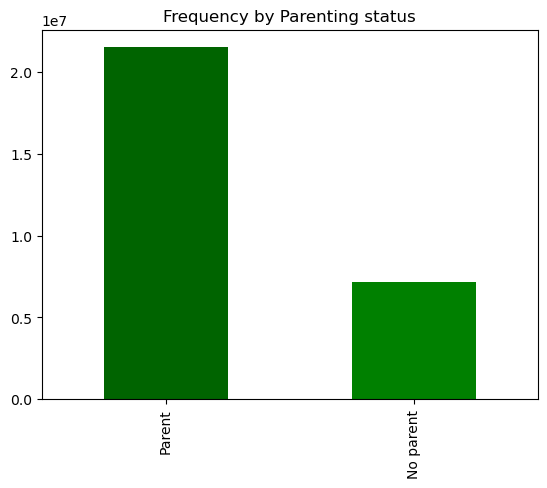

In [24]:
# Is there a difference between people with or without children in the use of the supermarket?

# Customers Pareting status distribution
parenting_status_bar = high_act_cust['parent_flag'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'], title = 'Frequency by Parenting status')

In [25]:
parenting_status_bar.figure.savefig(os.path.join(path, 'parenting_status_bar.png'))

Output: The Barchart shows that the most part of the clients profile are Parents.

# 2.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [26]:
# Aggregating the values for usage frequency (using days_since_prior_order column) for each customer profile column (income, age&children, age&family status) 

In [27]:
# Agg Income column x days_since_prior_order

high_act_cust.groupby('income_flag').agg({'days_since_prior_order':['min', 'mean', 'max']})

days_since_prior_order                 
                                 min       mean   max
income_flag                                          
High income                      0.0  10.590136  30.0
Low income                       0.0  10.758848  30.0
Middle income                    0.0  10.592703  30.0

Customers take an average of 10 days between one purchase and another on the platform, independant of level of income.

In [29]:
# Agg age & children column x days_since_prior_order

high_act_cust.groupby('Age & Children').agg({'days_since_prior_order':['min', 'mean', 'max']})

days_since_prior_order                 
                                        min       mean   max
Age & Children                                              
Middle age no parent                    0.0  10.567813  30.0
Middle age parent                       0.0  10.642999  30.0
Old age no parent                       0.0  10.596141  30.0
Old age parent                          0.0  10.626185  30.0
Young no parent                         0.0  10.716751  30.0
Young parent                            0.0  10.655211  30.0

Customers take an average of 10 days between one purchase and another on the platform independant of family situation.

In [31]:
# Agg age & marital status column x days_since_prior_order

high_act_cust.groupby('Age & Family status').agg({'days_since_prior_order':['min', 'mean', 'max']})

days_since_prior_order                 
                                             min       mean   max
Age & Family status                                              
Middle age divorced/widow                    0.0  10.502544  30.0
Middle age married                           0.0  10.642999  30.0
Middle age single                            0.0  10.580235  30.0
Old age divorced/widow                       0.0  10.596141  30.0
Old age married                              0.0  10.626185  30.0
Young age else                               0.0  10.580036  30.0
Young age married                            0.0  10.683167  30.0
Young age single                             0.0  10.716751  30.0

Customers take an average of 10 days between one purchase and another on the platform independant of marital status.


In [ ]:
# Aggregating the values for expediture (using 'prices' column) for each customer profile column (income, age&children, age&family status) 

In [38]:
# Income x prices

high_act_cust.groupby('income_flag').agg({'prices':['min', 'mean', 'max']})

prices                    
                 min       mean      max
income_flag                             
High income      1.0  21.758155  99999.0
Low income       1.0   7.318529  14900.0
Middle income    1.0   9.201059  99999.0

People with high income spend in average more money in the supermarket.

In [46]:
# Age & children x prices
high_act_cust.groupby('Age & Children').agg({'prices':['min', 'mean', 'max']})

prices                    
                        min       mean      max
Age & Children                                 
Middle age no parent    1.0  11.970455  99999.0
Middle age parent       1.0  11.912599  99999.0
Old age no parent       1.0  12.002592  99999.0
Old age parent          1.0  11.552559  99999.0
Young no parent         1.0  12.419443  99999.0
Young parent            1.0  11.834786  99999.0

Young people with no children spend in average more money in the supermarket.

In [47]:
# Age & marital status x prices
high_act_cust.groupby('Age & Family status').agg({'prices':['min', 'mean', 'max']})

prices                    
                             min       mean      max
Age & Family status                                 
Middle age divorced/widow    1.0  10.011346  99999.0
Middle age married           1.0  11.912599  99999.0
Middle age single            1.0  12.343318  99999.0
Old age divorced/widow       1.0  12.002592  99999.0
Old age married              1.0  11.552559  99999.0
Young age else               1.0  10.657319  99999.0
Young age married            1.0  12.272654  99999.0
Young age single             1.0  12.419443  99999.0

Young single people spend in average more money in the supermarket.
With the last 3 results, it is possible to say that the marketing target groups will be "single young people with no children and with high income"

# 3.Compare your customer profiles with regions and departments. Can you identify a link between them? 

In [49]:
# Because my computer has a low memory capacity, I decided to create a new column with all departments names as an option for mergind 
# this dataframe with the departments dataframe.

In [7]:
#Create department column using dept_id

high_act_cust.loc[high_act_cust['department_id'] == 1, 'department'] = 'frozen'
high_act_cust.loc[high_act_cust['department_id'] == 2, 'department'] = 'other'
high_act_cust.loc[high_act_cust['department_id'] == 3, 'department'] = 'bakery'
high_act_cust.loc[high_act_cust['department_id'] == 4, 'department'] = 'produce'
high_act_cust.loc[high_act_cust['department_id'] == 5, 'department'] = 'alcohol'
high_act_cust.loc[high_act_cust['department_id'] == 6, 'department'] = 'international'
high_act_cust.loc[high_act_cust['department_id'] == 7, 'department'] = 'beverages'
high_act_cust.loc[high_act_cust['department_id'] == 8, 'department'] = 'pets'
high_act_cust.loc[high_act_cust['department_id'] == 9, 'department'] = 'dry goods-pasta'
high_act_cust.loc[high_act_cust['department_id'] == 10, 'department'] = 'bulk'
high_act_cust.loc[high_act_cust['department_id'] == 11, 'department'] = 'personal care'
high_act_cust.loc[high_act_cust['department_id'] == 12, 'department'] = 'meat-seafood'
high_act_cust.loc[high_act_cust['department_id'] == 13, 'department'] = 'pantry'
high_act_cust.loc[high_act_cust['department_id'] == 14, 'department'] = 'breakfast'
high_act_cust.loc[high_act_cust['department_id'] == 15, 'department'] = 'canned goods'
high_act_cust.loc[high_act_cust['department_id'] == 16, 'department'] = 'dairy-eggs'
high_act_cust.loc[high_act_cust['department_id'] == 17, 'department'] = 'household'
high_act_cust.loc[high_act_cust['department_id'] == 18, 'department'] = 'babies'
high_act_cust.loc[high_act_cust['department_id'] == 19, 'department'] = 'snacks'
high_act_cust.loc[high_act_cust['department_id'] == 20, 'department'] = 'deli'
high_act_cust.loc[high_act_cust['department_id'] == 21, 'department'] = 'missing'

In [8]:
high_act_cust.head()

,user_id,State,Age,date_joined,n_dependants,fam_status,income,product_id,product_name,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,prices_mean_user,price_flag,user_median_days_since_order,mediandays_flag,Region,level_of_activity,age_flag,income_flag,parent_flag,Age & Children,Age & Family status,department
0,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,2543867,5,1,9,30.0,Mid range product,Busiest days,Average orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married,beverages
1,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,1285508,7,5,15,11.0,Mid range product,Regularly busy,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married,beverages
2,26711,Missouri,48,1/1/2017,3,married,165665,196,Soda,7,9.0,2578584,8,1,15,10.0,Mid range product,Busiest days,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married,beverages
3,26711,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,4,4.3,2524893,3,3,11,30.0,Low range product,Slowest days,Most orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married,produce
4,26711,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,4,4.3,2984525,4,1,17,19.0,Low range product,Busiest days,Average orders,8,New customer,8.205882,Low Spender,19.0,Frequent customer,Midwest,High activity customer,Middle age,High income,Parent,Middle age parent,Middle age married,produce


### Grouping the income and age & children by region

In [55]:
# INCOME

income_region = high_act_cust.groupby(['Region', 'income_flag']).size().unstack(fill_value=0)

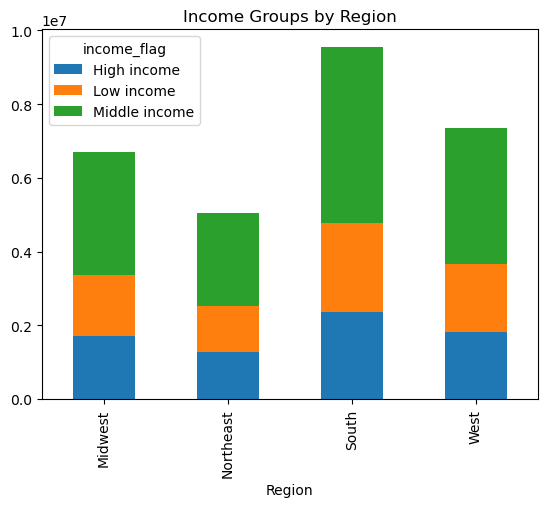

In [64]:
# Stacked bar chart
income_regio_bar = income_region.plot.bar(stacked = True, title = 'Income Groups by Region' )

In [70]:
# export
income_regio_bar.figure.savefig(os.path.join(path, 'stacked_income_bar.png'))

Output: In the Barchart it is possible to see how is the distribution of income groups by US region. Middle Income makes the largest number of clients in each region.

In [58]:
# Age & Children

age_children_region = high_act_cust.groupby(['Region', 'Age & Children']).size().unstack(fill_value=0)

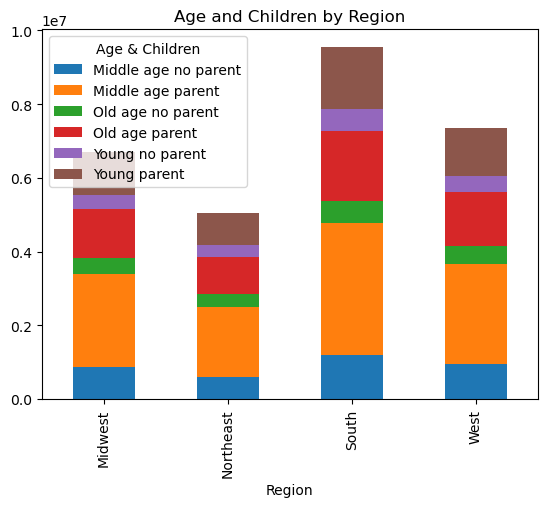

In [60]:
# Stacked bar chart
age_children_region_bar = age_children_region.plot.bar(stacked = True, title = 'Age and Children by Region')

In [69]:
#export

age_children_region_bar.figure.savefig(os.path.join(path, 'stacked_agechildren_bar.png'))

Output: In the Barchart it is possible to see how is the distribution of customer profile groups by US region. Middle age parent makes the largest number of clients in each region.

In [ ]:
# Barchart customer habit by region

In [18]:
# Region
region_dept = high_act_cust.groupby(['department', 'Region']).size().unstack(fill_value=0)

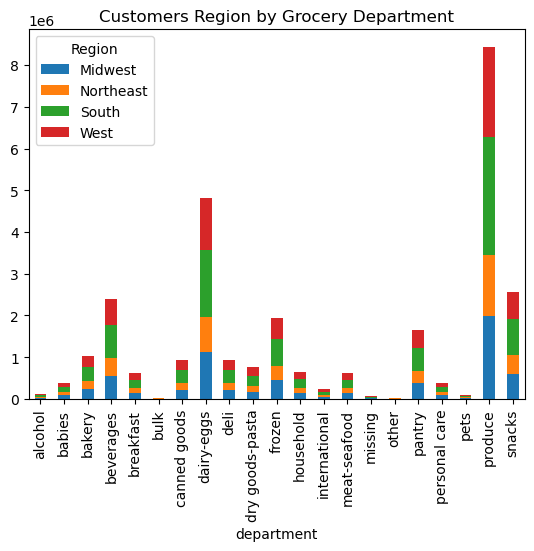

In [19]:
# Stacked bar chart
region_dept_chart = region_dept.plot.bar(stacked = True, title = 'Customers Region by Grocery Department' )

In [21]:
#Export
region_dept_chart.figure.savefig(os.path.join(path, 'region_dept_chart.png'))

Output: In the Barchart it is possible to see the clients consuming habits by US region. Produce is the most popular department.

### Grouping the income, age & children status by grocery department

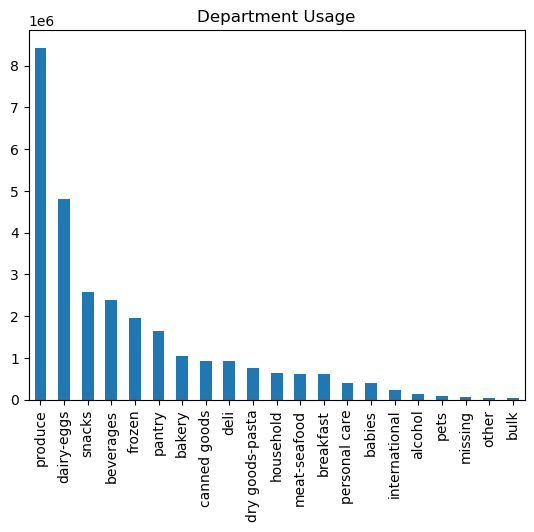

In [10]:
bar_chart_dept = high_act_cust ['department'].value_counts().plot.bar(title = 'Department Usage')

In [11]:
#export
bar_chart_dept.figure.savefig(os.path.join(path, 'dept_use.png'))

Output: In the Barchart it is possible to see which departments are most popular. Produce is the most popular department.

In [72]:
# INCOME
income_dept = high_act_cust.groupby(['department', 'income_flag']).size().unstack(fill_value=0)


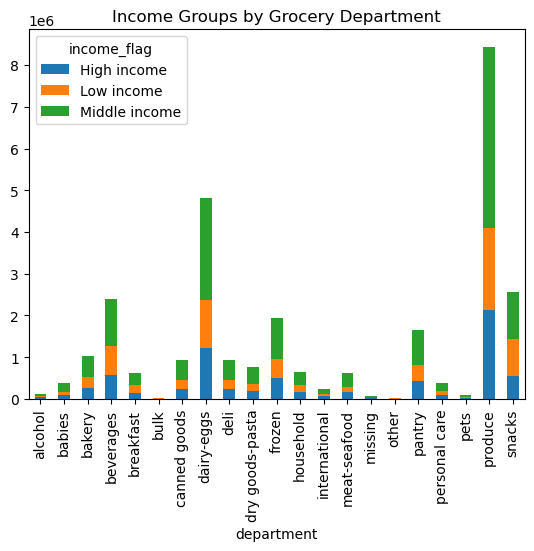

In [74]:
# Stacked bar chart
income_dept_chart = income_dept.plot.bar(stacked = True, title = 'Income Groups by Grocery Department' )

In [75]:
#export
income_dept_chart.figure.savefig(os.path.join(path, 'stacked_income_dept_bar.png'))

Output: Here it is possible to see the consumer habits by income group. The same pattern from the other charts is here. The produce department keeps being the most popular.

In [76]:
# age & children

children_dept = high_act_cust.groupby(['department', 'Age & Children']).size().unstack(fill_value=0)

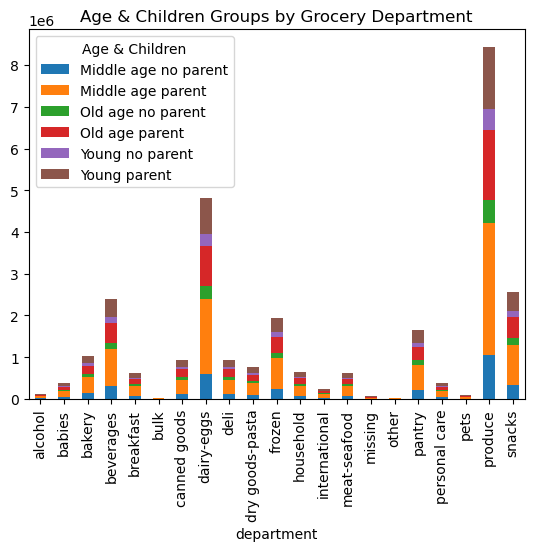

In [77]:
# Stacked bar chart
children_dept_chart = children_dept.plot.bar(stacked = True, title = 'Age & Children Groups by Grocery Department' )

In [78]:
#export
children_dept_chart.figure.savefig(os.path.join(path, 'stacked_children_dept_bar.png'))

Output: Here it is possible to see the consumer habits by customer profile. The same pattern from the other charts is here. The produce department keeps being the most popular.

In [12]:
# stacked bar loyalty flag x department

loyalty_dept = high_act_cust.groupby(['department', 'loyalty_flag']).size().unstack(fill_value=0)

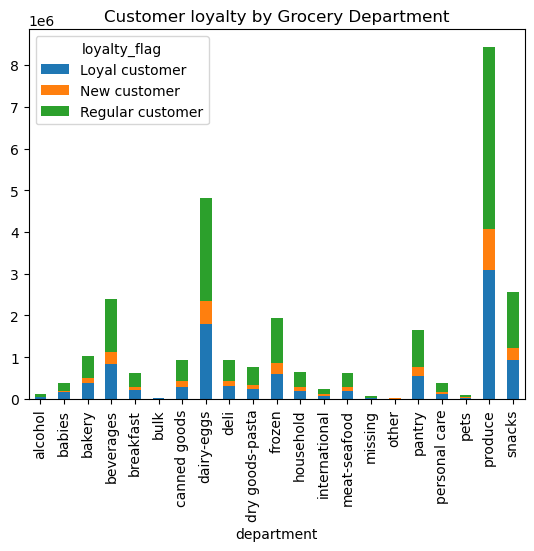

In [16]:
loyalty_dept_bar = loyalty_dept.plot.bar(stacked = True, title = 'Customer loyalty by Grocery Department' )

In [17]:
#export
loyalty_dept_bar.figure.savefig(os.path.join(path, 'loyalty_dept_bar.png'))

Output: Here it is possible to see the consumer habits by loyalty flag. The same pattern from the other charts is here. The produce department keeps being the most popular.